In [1]:
#importing libraries

In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [3]:
#generating random data

In [4]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

In [5]:
#scatter plot

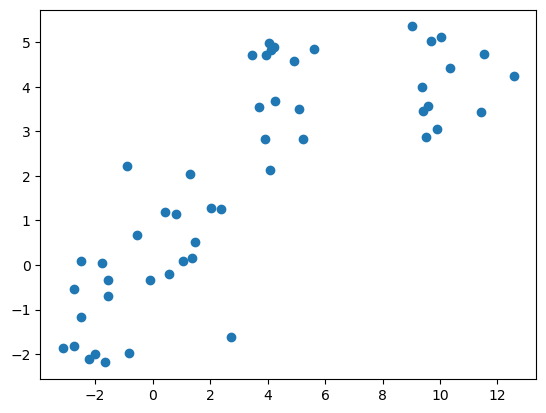

In [6]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [7]:
#agglomerative clustering

In [8]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [9]:
#fitting the model

In [10]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [11]:
#show clustering

In [12]:
plt.figure(figsize=(6,4))
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)

<Figure size 600x400 with 0 Axes>

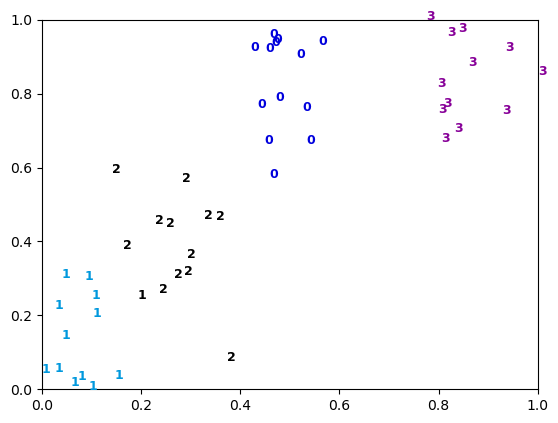

In [13]:
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

In [14]:
#displaying plot

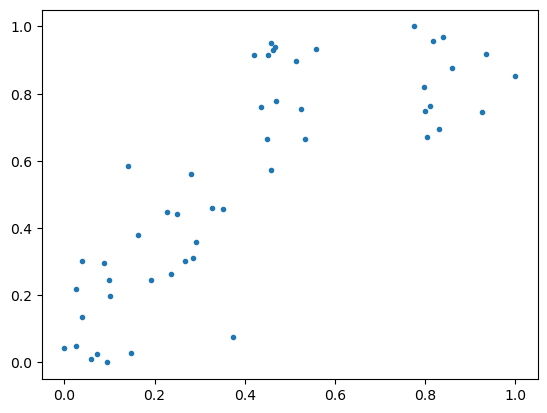

In [15]:
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

In [16]:
#combined plot

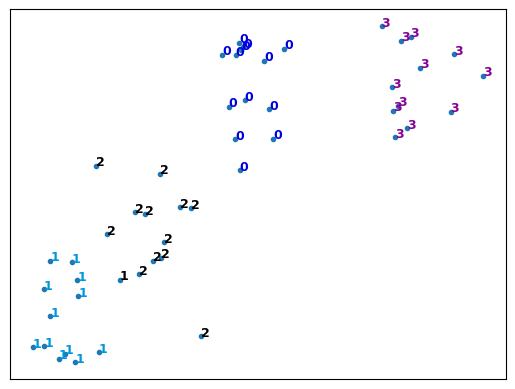

In [17]:
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

In [18]:
#distance matrix

In [19]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.2722712  0.19871739 ... 0.7953268  1.23518351 0.28277775]
 [0.2722712  0.         0.23026168 ... 0.69811372 1.03272192 0.36115512]
 [0.19871739 0.23026168 0.         ... 0.89900393 1.26294578 0.44920366]
 ...
 [0.7953268  0.69811372 0.89900393 ... 0.         0.58046439 0.54244691]
 [1.23518351 1.03272192 1.26294578 ... 0.58046439 0.         1.04875754]
 [0.28277775 0.36115512 0.44920366 ... 0.54244691 1.04875754 0.        ]]


In [20]:
#using complete linkage

In [21]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\MADHUSUDAN\AppData\Local\Temp\ipykernel_14848\3518085107.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


In [22]:
#dendogram

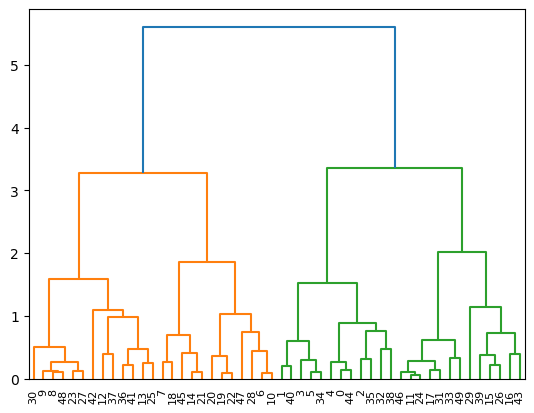

In [23]:
dendro = hierarchy.dendrogram(Z)

In [24]:
#changing complete linkage to average

In [25]:
Z = hierarchy.linkage(dist_matrix, 'average')

C:\Users\MADHUSUDAN\AppData\Local\Temp\ipykernel_14848\2305343628.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


In [26]:
#dendogram

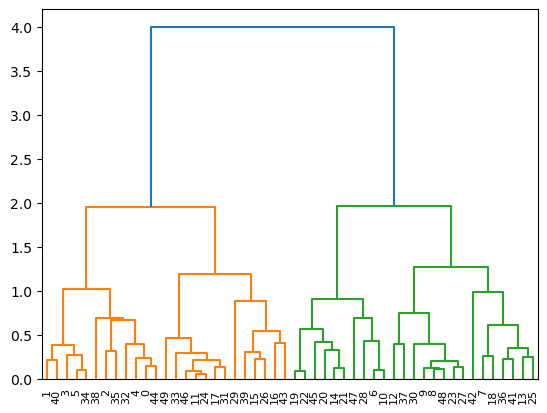

In [27]:
dendro = hierarchy.dendrogram(Z)

In [28]:
#loading the dataset

In [29]:
df = pd.read_csv("C:/Users/MADHUSUDAN/Downloads/edX10.csv")
df.head()

manufact    model   sales  resale type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919   16.36    0    21.5      1.8      140    101.2   
1    Acura       TL  39.384  19.875    0    28.4      3.2      225    108.1   
2    Acura       CL  14.114  18.225    0  $null$      3.2      225    106.9   
3    Acura       RL   8.588  29.725    0      42      3.5      210    114.6   
4     Audi       A4  20.397  22.255    0   23.99      1.8      150    102.6   

  width length curb_wgt fuel_cap mpg lnsales  partition  
0  67.3  172.4    2.639     13.2  28   2.828          0  
1  70.3  192.9    3.517     17.2  25   3.673          0  
2  70.6    192     3.47     17.2  26   2.647          0  
3  71.4  196.6     3.85       18  22    2.15          0  
4  68.2    178    2.998     16.4  27   3.015          0

In [30]:
df.shape

(159, 16)

In [31]:
#data cleaning

In [32]:
print ("Shape of dataset before cleaning: ", df.size)
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

Shape of dataset before cleaning:  2544


In [33]:
df = df.dropna()
df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.size)
df.head(5)

Shape of dataset after cleaning:  1872


manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0  
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0  
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0  
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0

In [34]:
#feature selection

In [35]:
featureset = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [36]:
#normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333],
       [0.45714286, 0.64556962, 0.44251627, 0.68263473, 0.64980027,
        0.62329193, 0.61751152, 0.2       ],
       [0.25714286, 0.34936709, 0.31887202, 0.35329341, 0.35419441,
        0.40434783, 0.29032258, 0.3       ],
       [0.25714286, 0.34936709, 0.40780911, 0.49700599, 0.51398136,
        0.48975155, 0.37788018, 0.32666667],
       [0.3       , 0.30379747, 0.35574837, 0.60479042, 0.60186418,
        0.45745342, 0.331797

In [38]:
#clustering using Scipy

In [39]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

C:\Users\MADHUSUDAN\AppData\Local\Temp\ipykernel_14848\458117257.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [40]:
#using complete

In [41]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

C:\Users\MADHUSUDAN\AppData\Local\Temp\ipykernel_14848\227076933.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [42]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [43]:
#no of clusters

In [44]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

In [45]:
#plotting a dendogram

In [46]:
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

In [47]:
#figure

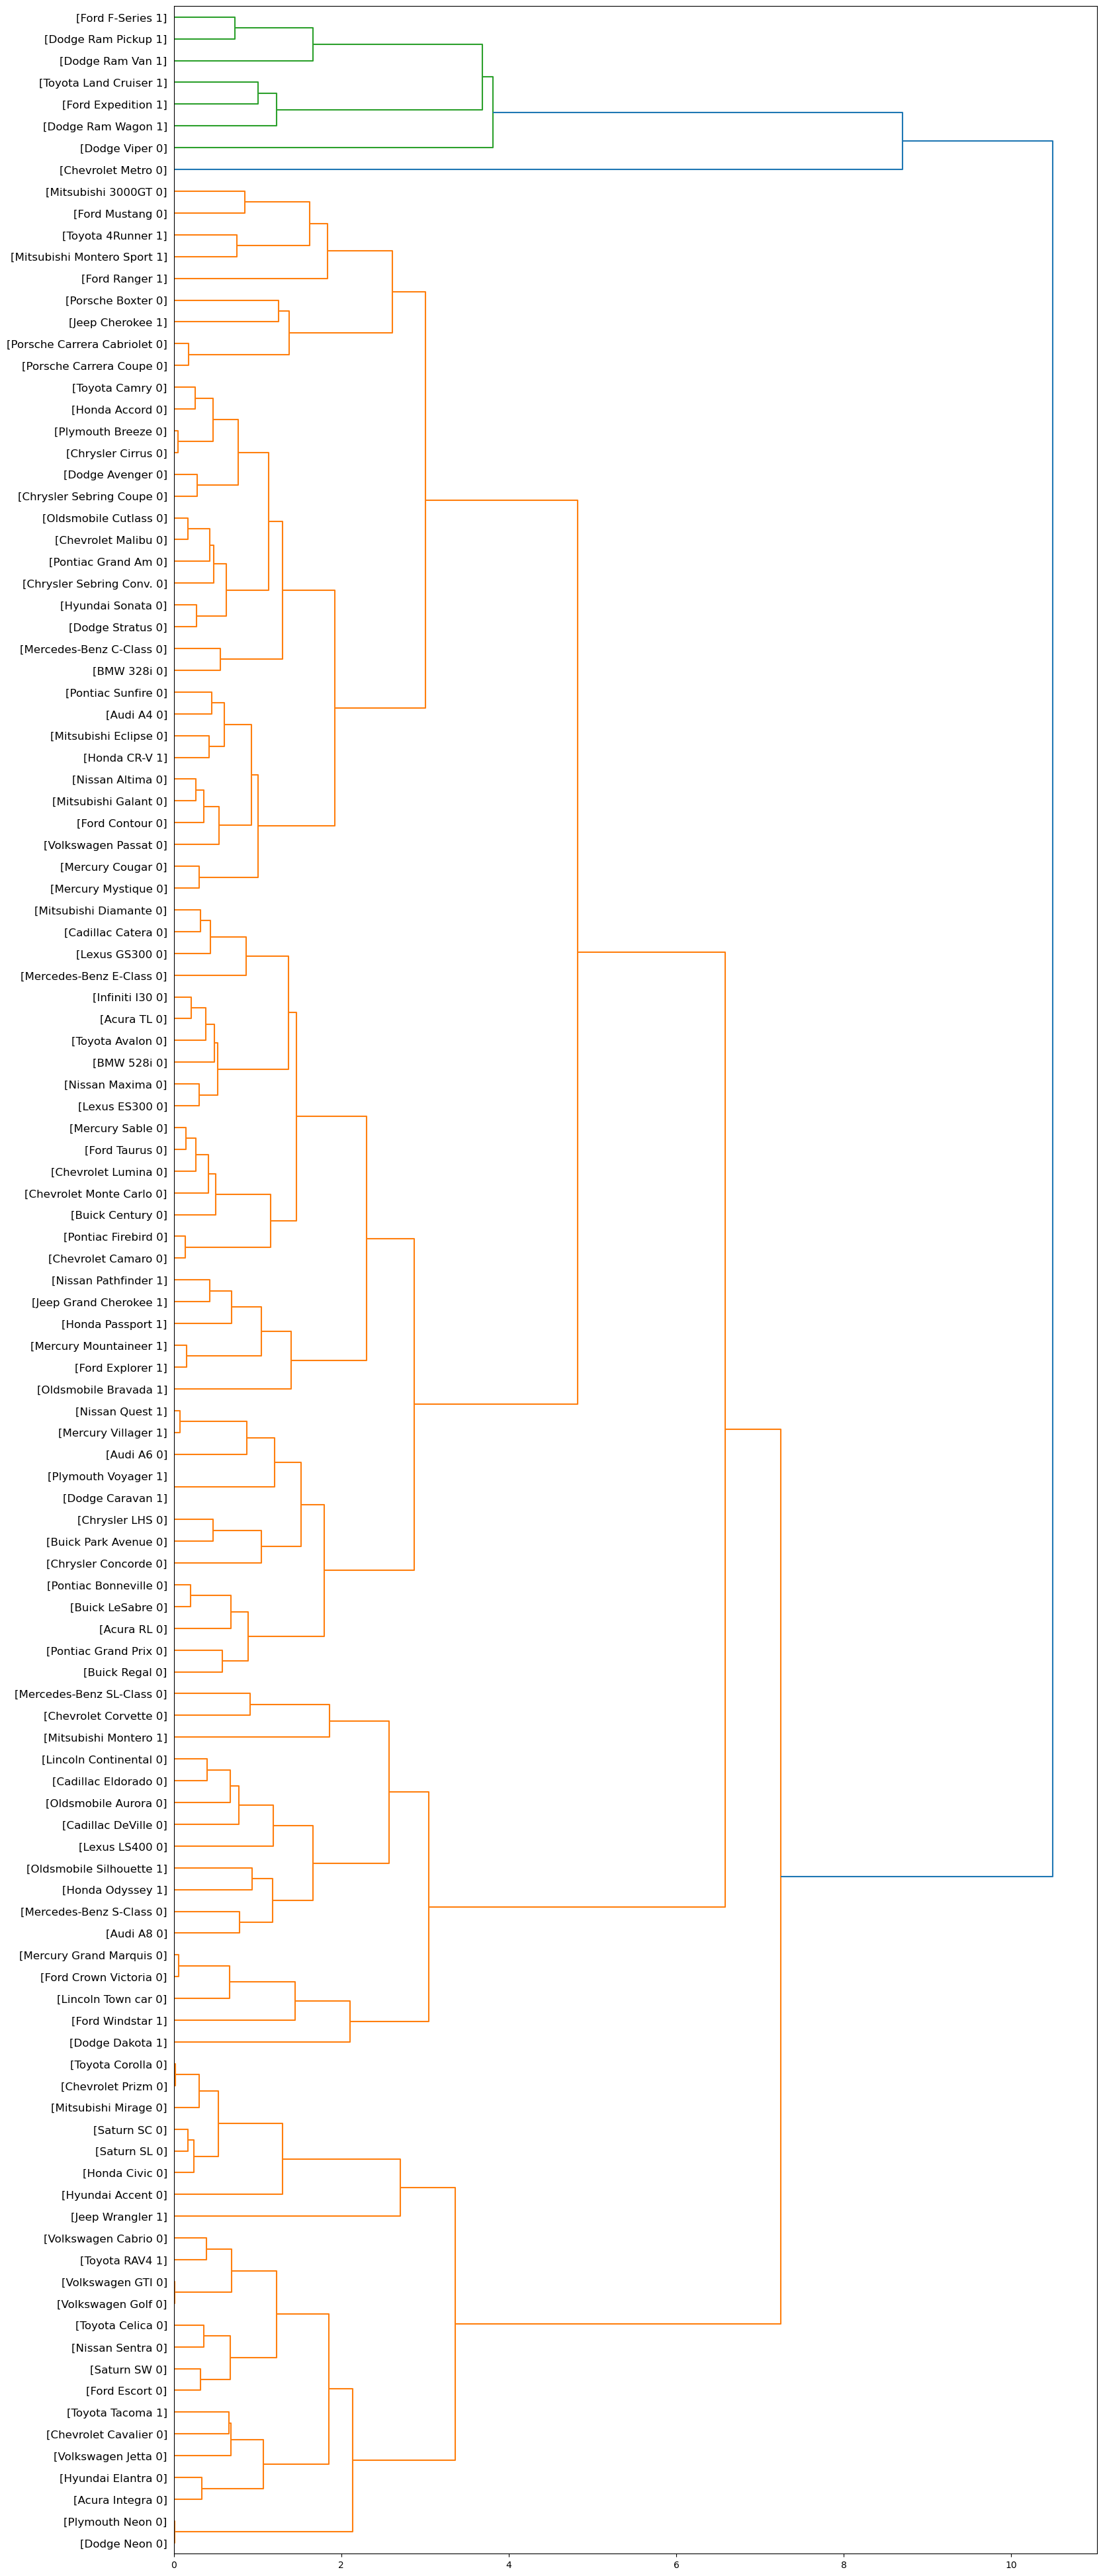

In [48]:
fig = pylab.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [49]:
#clustering using scikit-learn

In [50]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [51]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\MADHUSUDAN\AppData\Local\Temp\ipykernel_14848\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


In [52]:
#plotting a dendogram

In [53]:
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )    

In [54]:
#figure

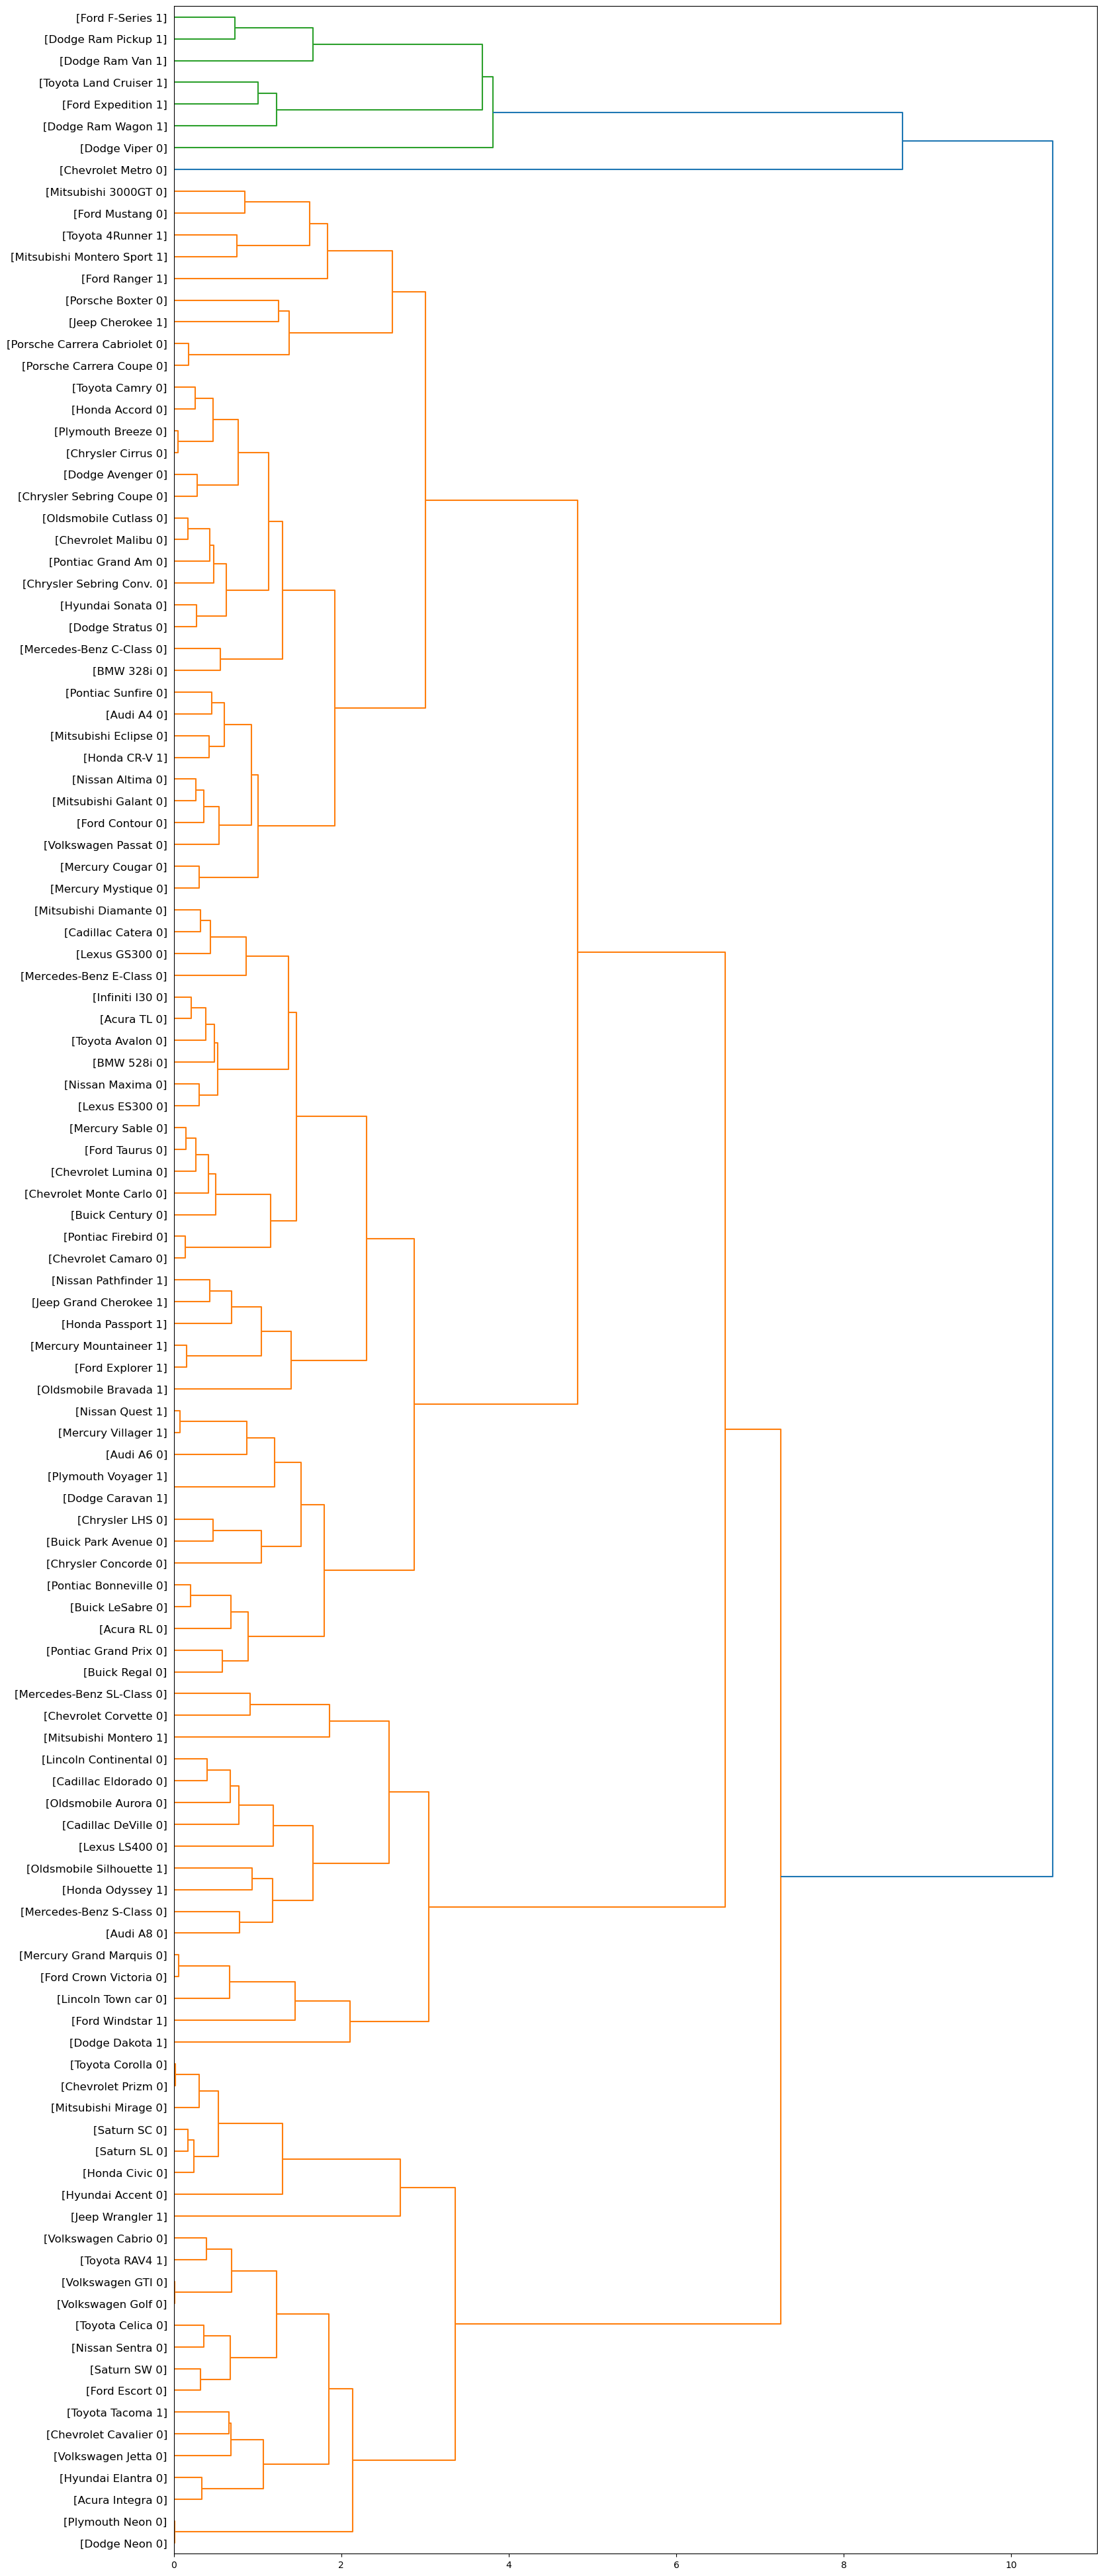

In [55]:
fig = pylab.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [56]:
#agglomerative

In [57]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)
agglom.labels_

C:\Users\MADHUSUDAN\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:566: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1], dtype=int64)

In [58]:
#adding new field

In [59]:
df['cluster_'] = agglom.labels_
df.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0   

   cluster_  
0         1  
1         2  
2         2  
3         3  
4         2

In [60]:
#plotting

In [61]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

C:\Users\MADHUSUDAN\AppData\Local\Temp\ipykernel_14848\803856816.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

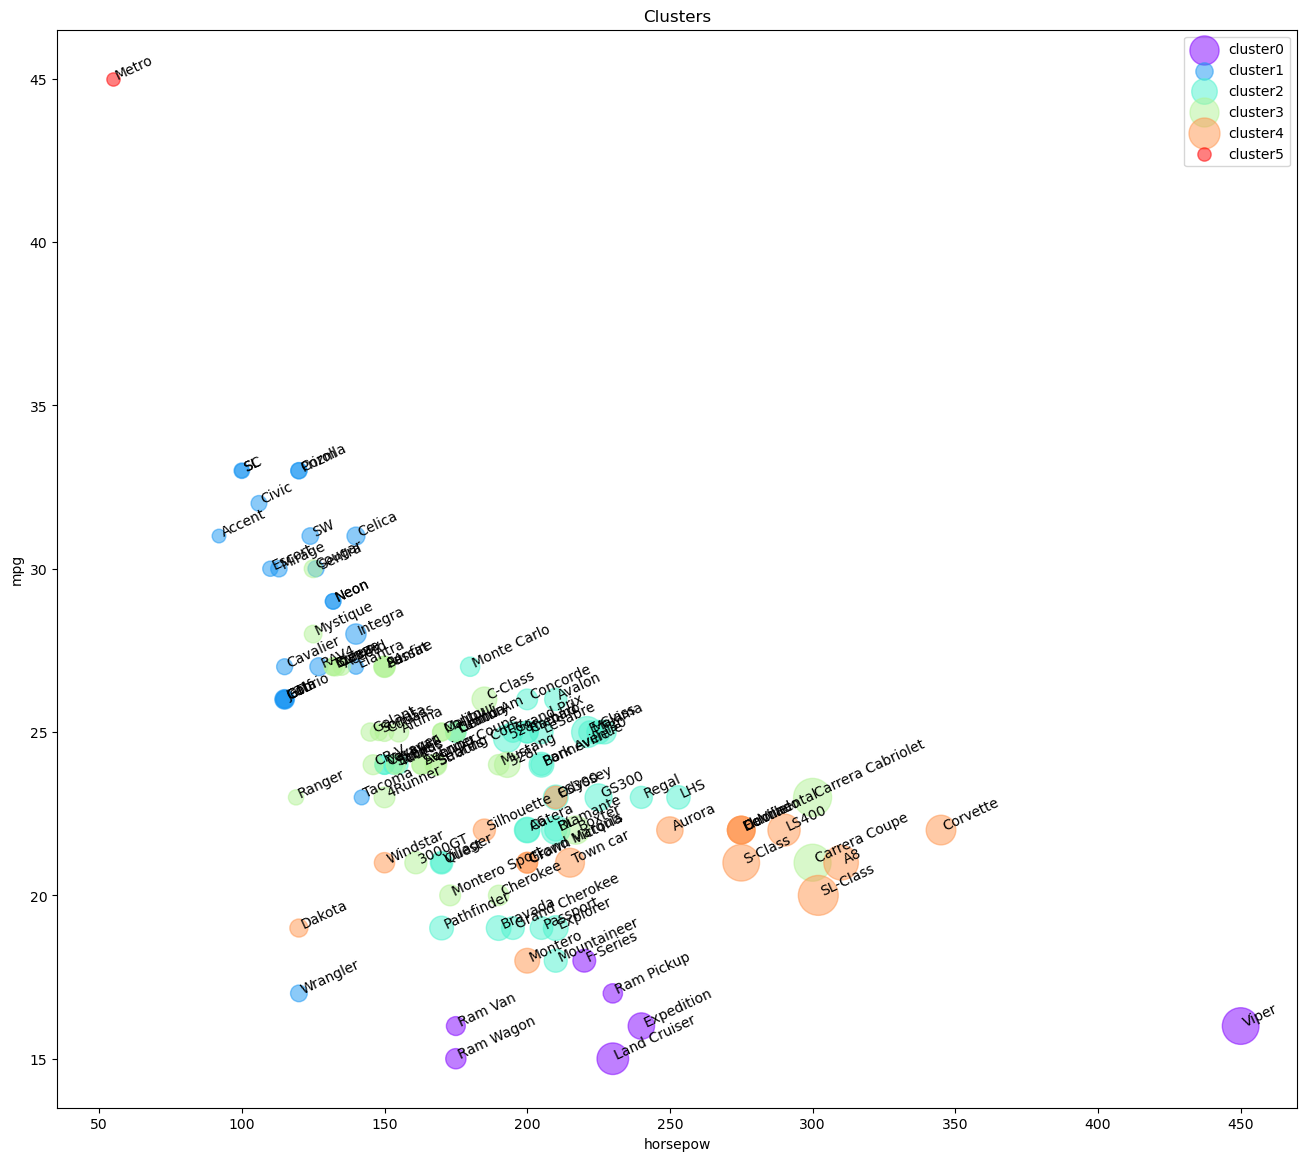

In [62]:
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [63]:
#counting no of classes

In [64]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [65]:
#characteristics of each cluster

In [66]:
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

C:\Users\MADHUSUDAN\AppData\Local\Temp\ipykernel_14848\2585305412.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   118.500000  1.890000  29.550000  14.226100
         1.0   129.666667  2.300000  22.333333  14.292000
2        0.0   203.615385  3.284615  24.223077  27.988692
         1.0   182.000000  3.420000  20.300000  26.120600
3        0.0   168.107143  2.557143  25.107143  24.693786
         1.0   155.600000  2.840000  22.000000  19.807000
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0    55.000000  1.000000  45.000000   9.235000

In [67]:
#plotting

C:\Users\MADHUSUDAN\AppData\Local\Temp\ipykernel_14848\731385151.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

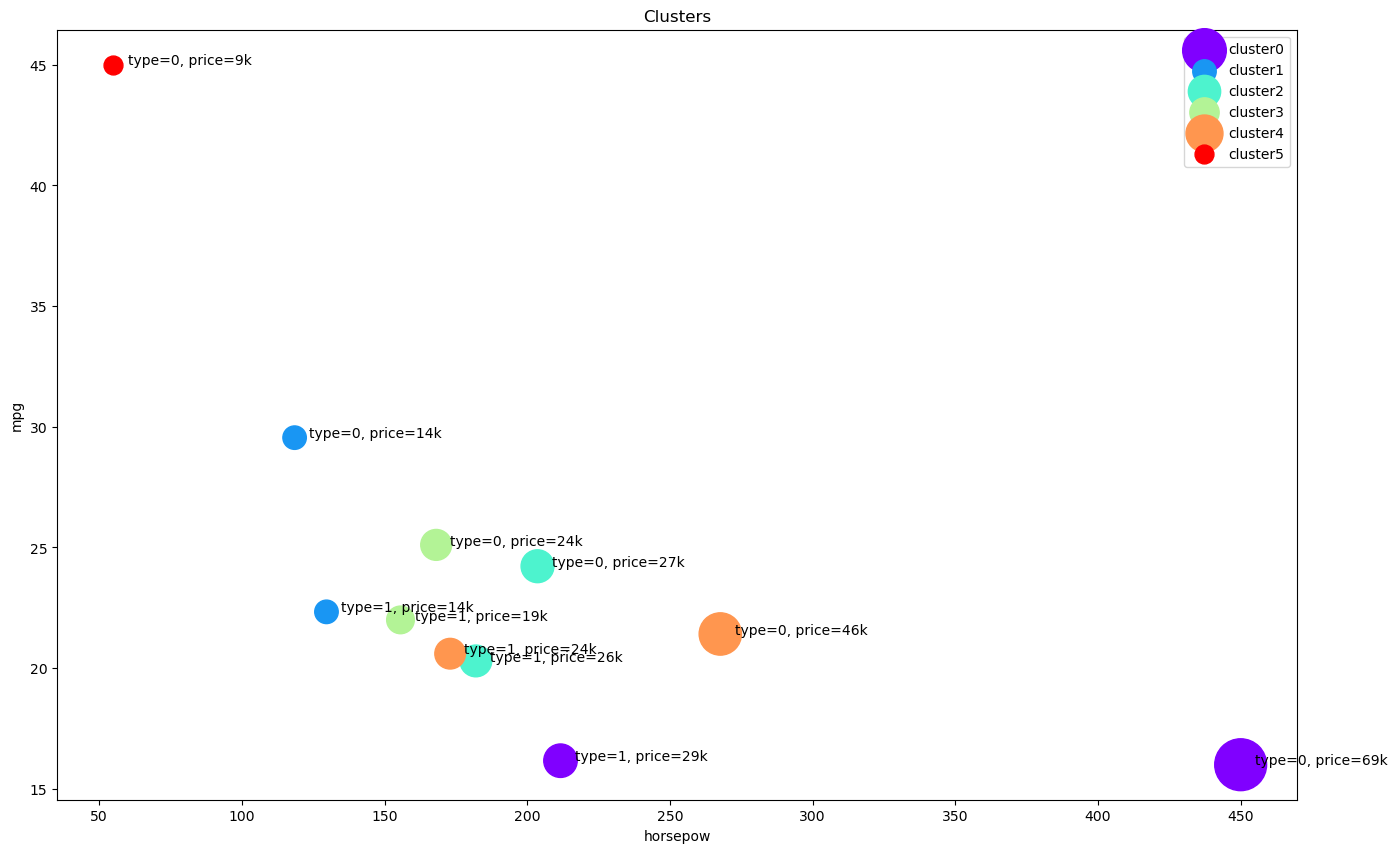

In [68]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')